GTZAN Dataset
10 genres with 100 audio files each
Audio files are 30 seconds long


In [1]:
import pandas as pd

In [2]:
GENERAL_PATH='/content/drive/MyDrive/Dissertation Working/CNN Model Vanilla/Data'
df=pd.read_csv(f'{GENERAL_PATH}/features_3_sec.csv')
df.head(10)
df.shape
df.label.value_counts().reset_index()

,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


Text(0, 0.5, 'Count')

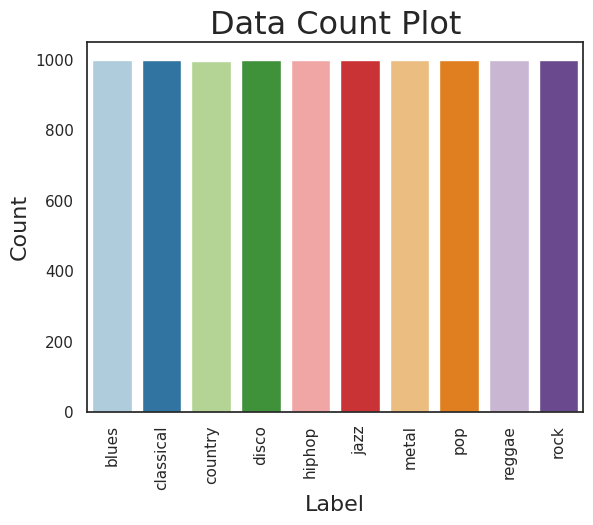

In [ ]:
sns.countplot(x=df.label) # plot the categories
plt.xticks(rotation=90);
plt.title("Data Count Plot", fontsize = 23);
plt.xlabel('Label', fontsize = 16)
plt.ylabel('Count', fontsize = 16)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mean_cols size: 28


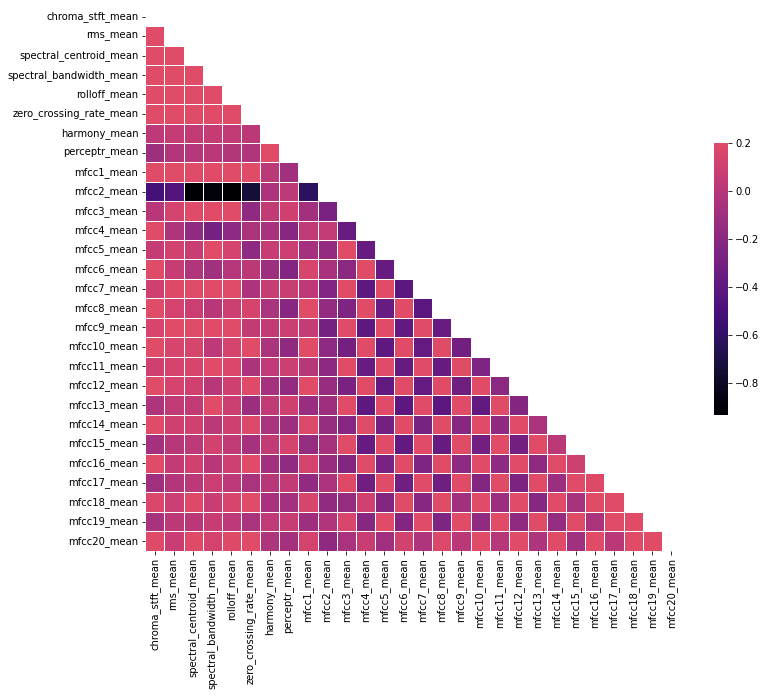

In [ ]:
mean_cols = [col for col in df.columns if 'mean' in col]
corr = df[mean_cols].corr()

mask = np.triu(np.ones_like(corr,  dtype = bool))
plt.figure(figsize = (6, 10))
sns.heatmap(data = corr, mask = mask, vmax =.2, cmap = 'magma', linewidths = .5, center = 0, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
X = df.drop(['label'],axis = 1)
X = X.iloc[0:, 2:]
y = df['label']
transformer = preprocessing.MinMaxScaler()
x_trans = transformer.fit_transform(X)
X = pd.DataFrame(x_trans, columns = X.columns)
PCA_model = PCA(n_components=2)
df_min = PCA_model.fit_transform(X)
df_min = pd.DataFrame(df_min, columns = ['PCA Column 1', 'PCA Column 2'])
df_min = pd.concat([df_min, y], axis = 1)
df_min.head()

,PCA Column 1,PCA Column 2,label
0,-0.242167,-0.121147,blues
1,-0.276062,-0.230291,blues
2,-0.190024,-0.119509,blues
3,-0.278550,-0.167689,blues
4,-0.309771,-0.187990,blues


Text(0.5, 1.0, 'PCA Analysis on Entire Dataset')

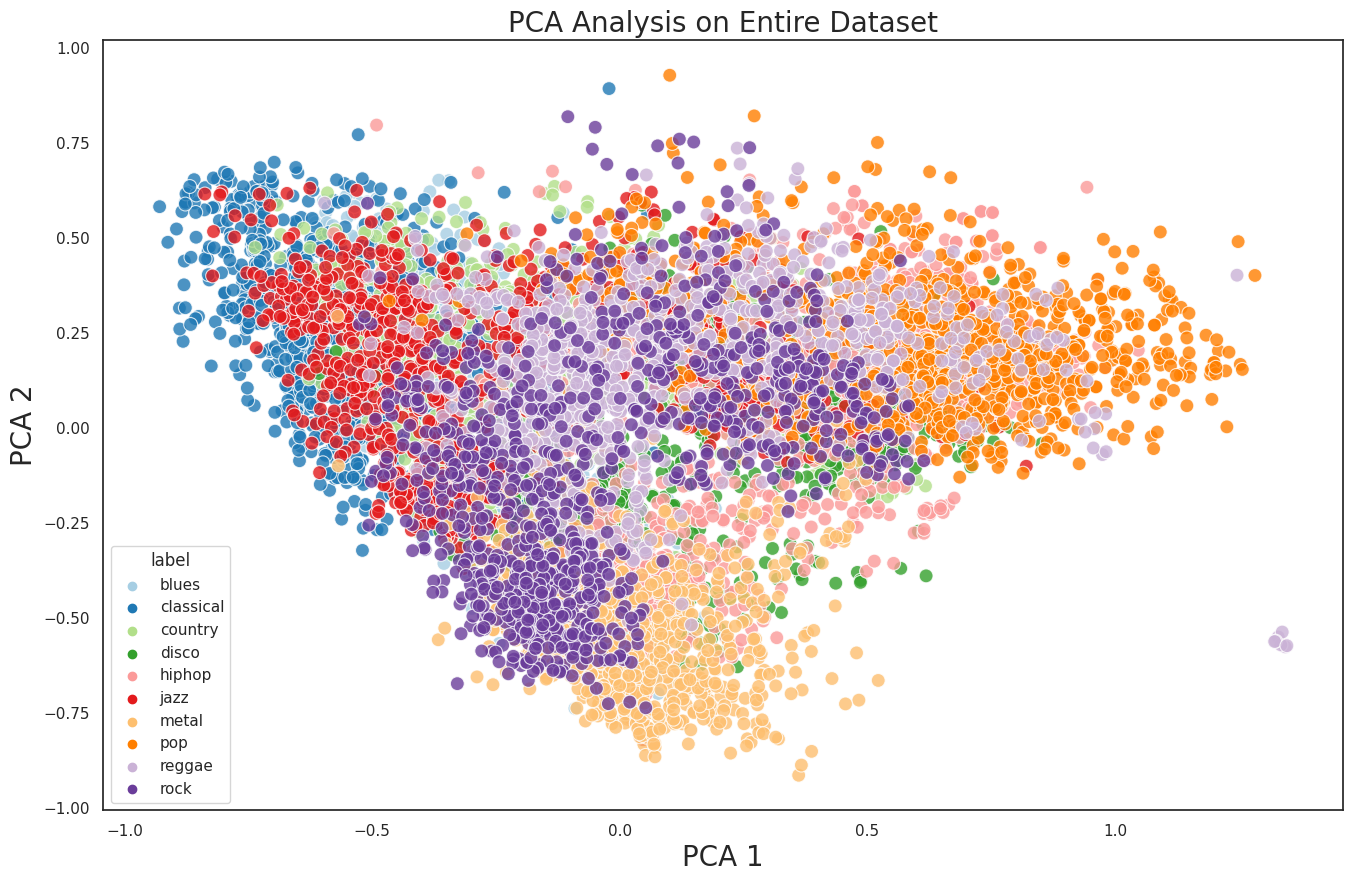

In [ ]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1)
sns.set_style(style='white')
sns.set_palette("Paired")
sns.scatterplot(x = df_min['PCA Column 1'], y = df_min['PCA Column 2'], data = df_min, hue = 'label', s = 100, alpha = 0.8)
plt.xlabel('PCA 1', fontsize=20);
plt.ylabel('PCA 2', fontsize=20);
plt.title('PCA Analysis on Entire Dataset', fontsize=20)

In [ ]:
df_min = df_min[df_min.label != "blues"]
df_min = df_min[df_min.label != "country"]
df_min = df_min[df_min.label != "disco"]
df_min = df_min[df_min.label != "hiphop"]
df_min = df_min[df_min.label != "jazz"]
df_min = df_min[df_min.label != "reggae"]
df_min = df_min[df_min.label != "rock"]
df_min.head()

,PCA Column 1,PCA Column 2,label
1000,-0.550832,-0.143498,classical
1001,-0.558559,0.047859,classical
1002,-0.523735,0.160769,classical
1003,-0.561044,0.003017,classical
1004,-0.520933,0.050902,classical


Text(0.5, 1.0, 'PCA Analysis on Classical, Metal, Pop')

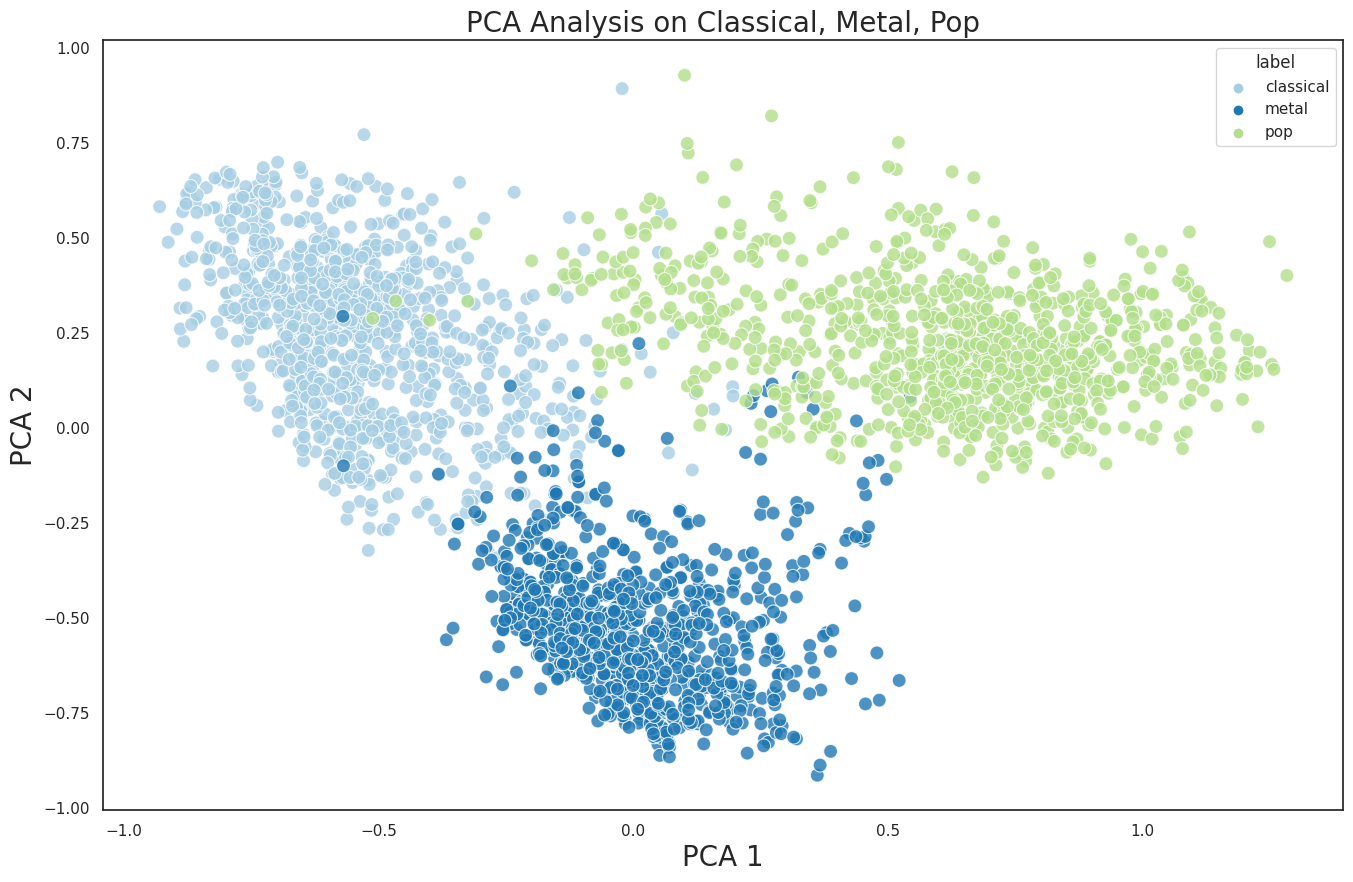

In [ ]:
plt.figure(figsize = (16, 10))
sns.set(font_scale=1)
sns.set_style(style='white')
sns.set_palette("Paired")
sns.scatterplot(x = df_min['PCA Column 1'], y = df_min['PCA Column 2'], data = df_min, hue = 'label', s = 100, alpha = 0.8)
plt.xlabel('PCA 1', fontsize=20);
plt.ylabel('PCA 2', fontsize=20);
plt.title('PCA Analysis on Classical, Metal, Pop', fontsize=20)

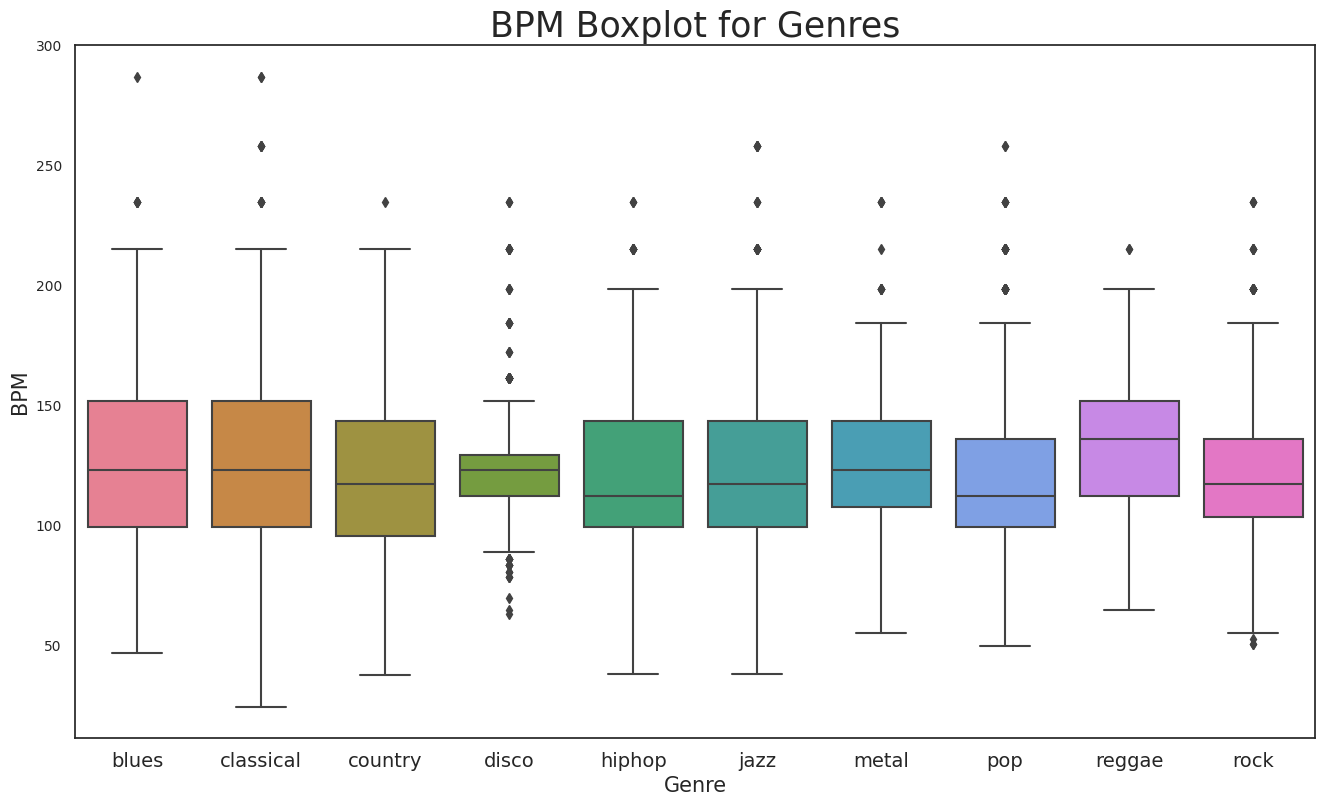

In [ ]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [3]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


general_path = '/content/drive/MyDrive/Dissertation Working/CNN Model Vanilla/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Raw audio signal waveplot

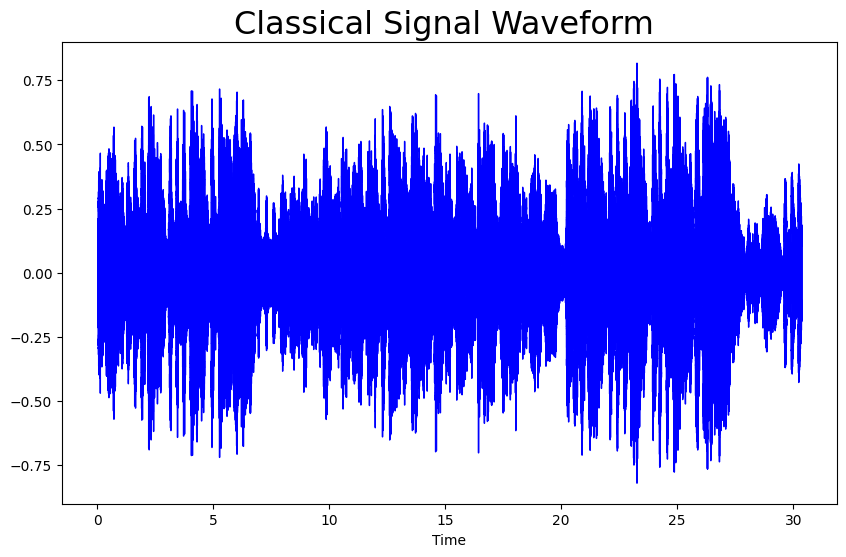

In [7]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00042.wav')
audio_file, _ = librosa.effects.trim(y)
plt.figure(figsize = (10, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#0000FF");
plt.title("Classical Signal Waveform ", fontsize = 23);

Short-time Fourier transform

Text(0, 0.5, 'Frequency')

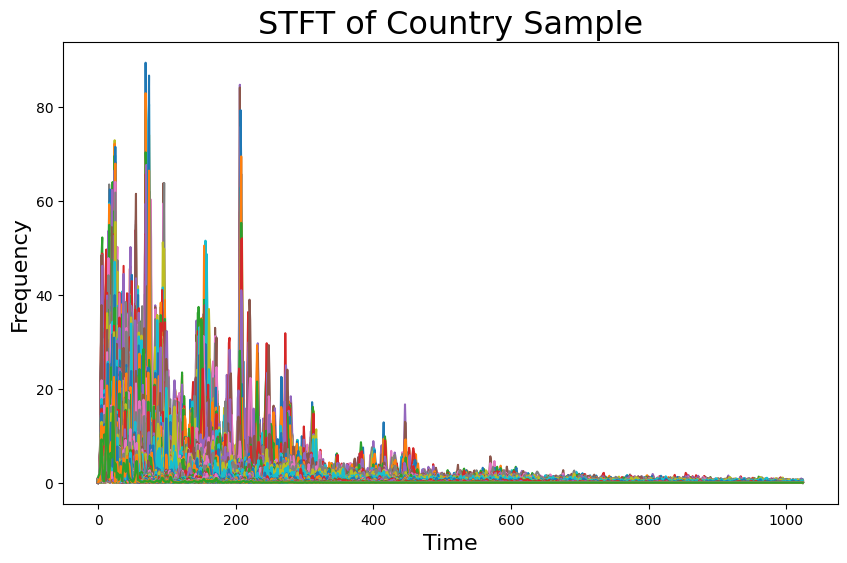

In [9]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/country/country.00025.wav')
audio_file, _ = librosa.effects.trim(y)
n_fft = 2048
hop_length = 512
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))
plt.figure(figsize = (10, 6))
plt.title("STFT of Country Sample", fontsize = 23);
plt.plot(D);
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)

Text(0, 0.5, 'Frequency')

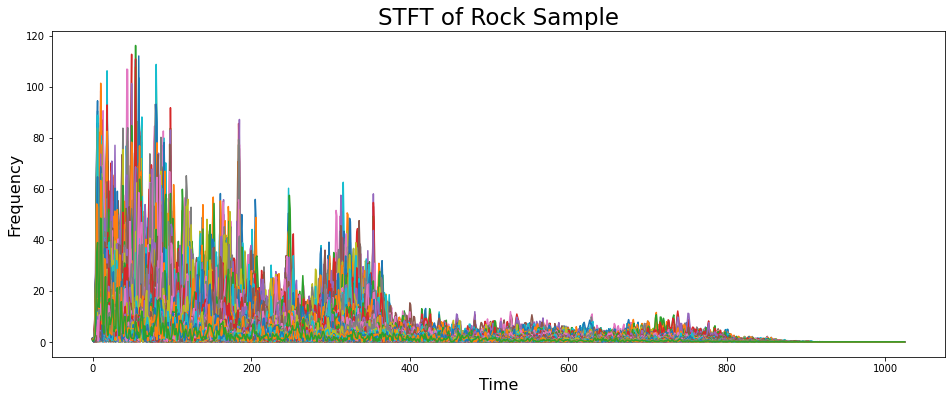

In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/rock/rock.00025.wav')
audio_file, _ = librosa.effects.trim(y)
n_fft = 2048
hop_length = 512
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))
plt.figure(figsize = (16, 6))
plt.title("STFT of Rock Sample", fontsize = 23);
plt.plot(D);
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)

Chroma Frequencies

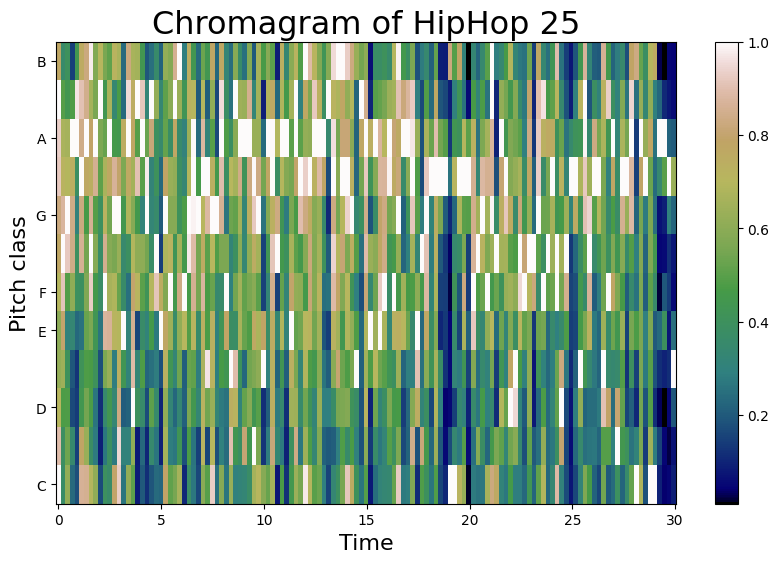

In [15]:
hop_length = 5000
y, sr = librosa.load(f'{general_path}/genres_original/hiphop/hiphop.00025.wav')
audio_file, _ = librosa.effects.trim(y)
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)

fig, ax = plt.subplots(figsize=(10,6))
plt.title("Chromagram of HipHop 25", fontsize = 23);
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Pitch Class', fontsize = 16)
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='gist_earth');
fig.colorbar(img, ax=ax)

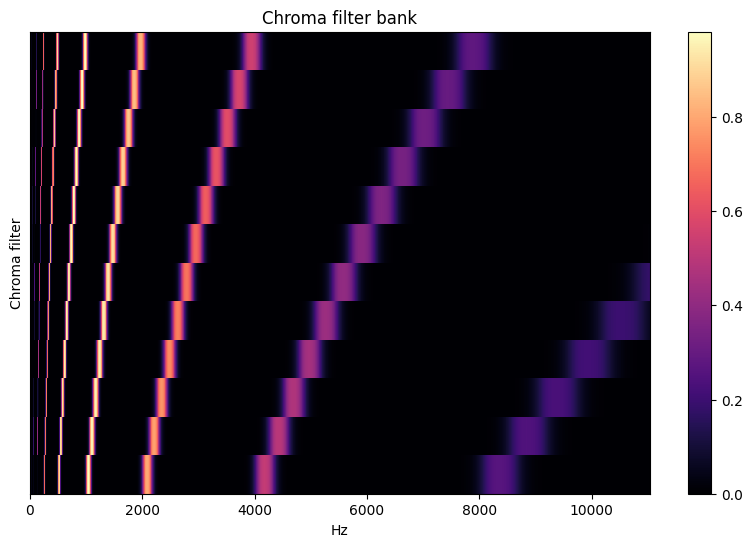

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
# From https://librosa.org/doc/latest/generated/librosa.filters.chroma.html#librosa.filters.chroma
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

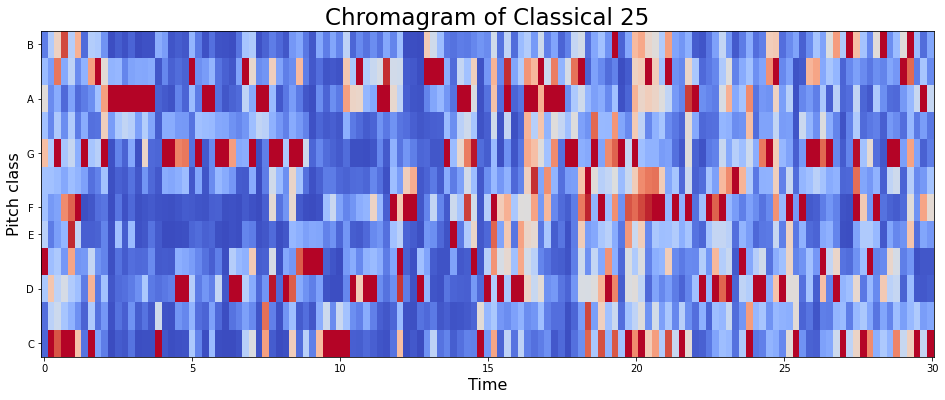

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00025.wav')
audio_file, _ = librosa.effects.trim(y)
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
hop_length = 5000
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)

plt.figure(figsize=(16, 6))
plt.title("Chromagram of Classical 25", fontsize = 23);
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Pitch Class', fontsize = 16)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

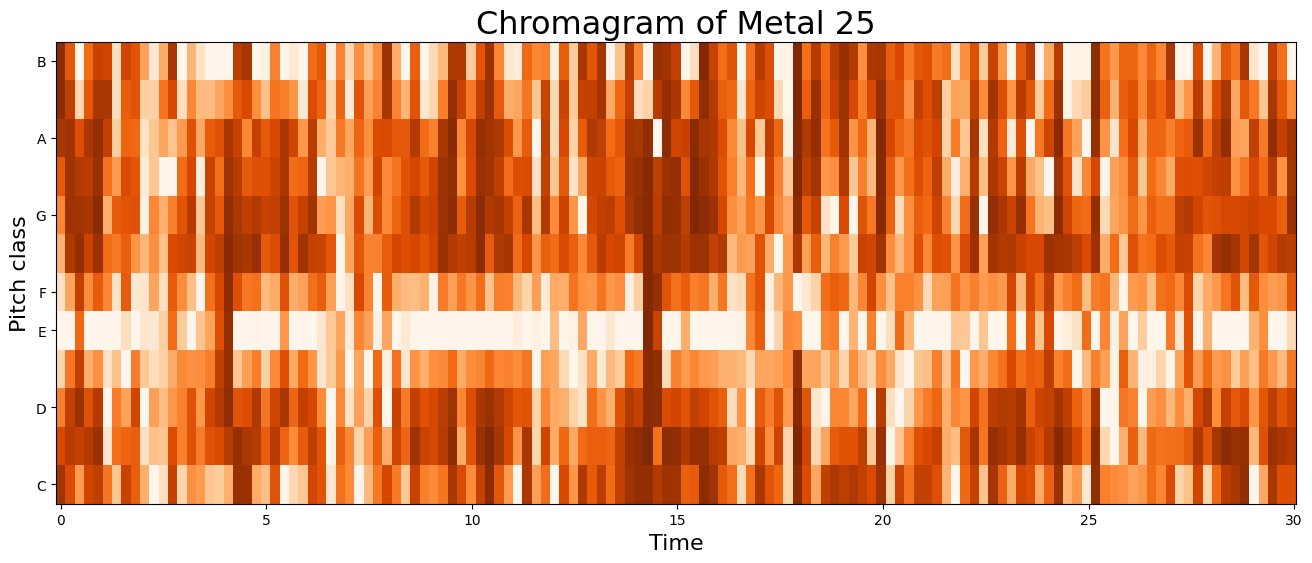

In [17]:
, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00025.wav')
audio_file, _ = librosa.effects.trim(y)
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
hop_length = 5000
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)

plt.figure(figsize=(16, 6))
plt.title("Chromagram of Metal 25", fontsize = 23);
plt.xlabel('Time', fontsize = 16)
plt.ylabel('Pitch Class', fontsize = 16)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='Oranges_r');

Spectogram


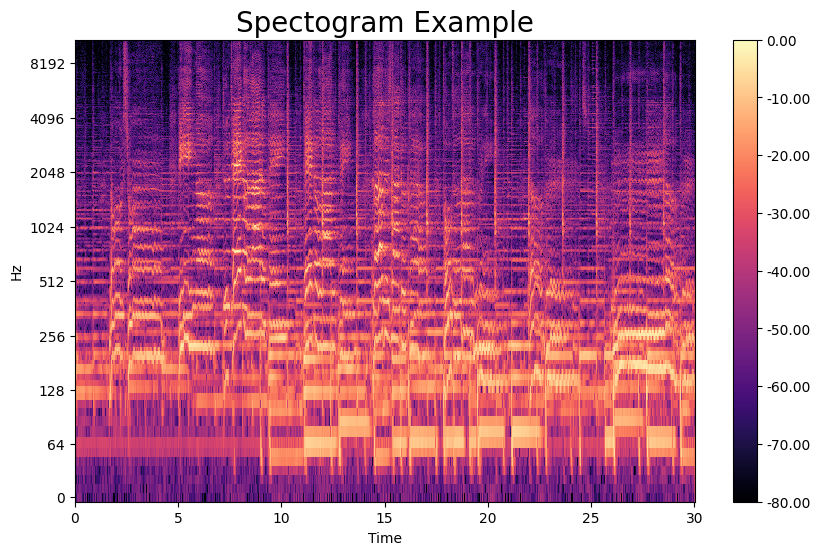

In [22]:
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# plot transformed data as spectogram
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

Mel Spectogram

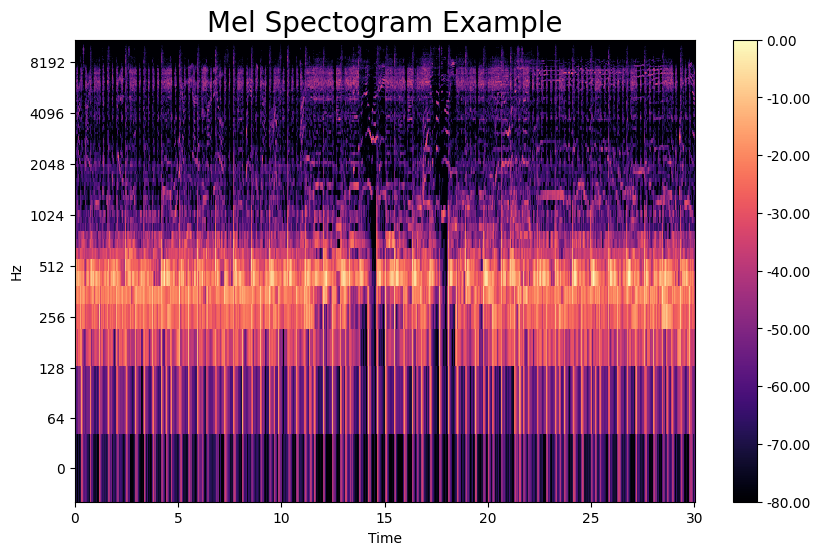

In [23]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

MFCC

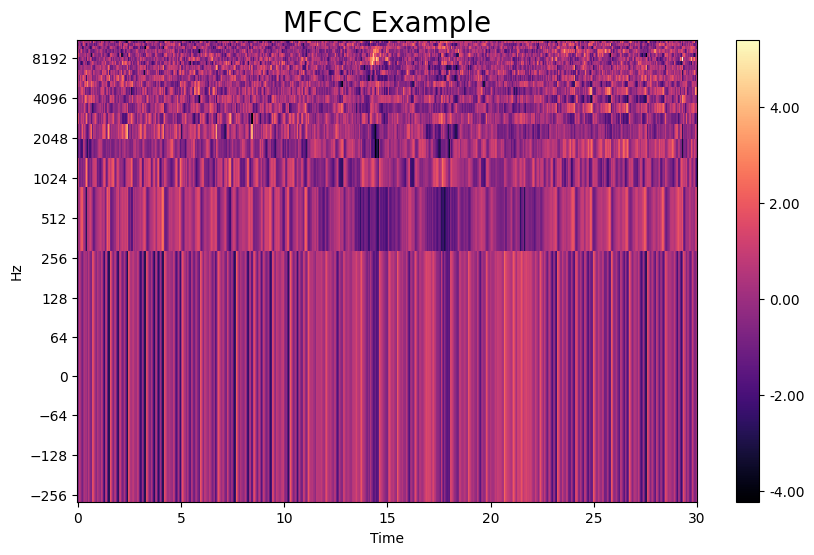

In [34]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='log', ax=ax, cmap='magma');
ax.set_title('MFCC Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

MFCC OF CLASSICAL

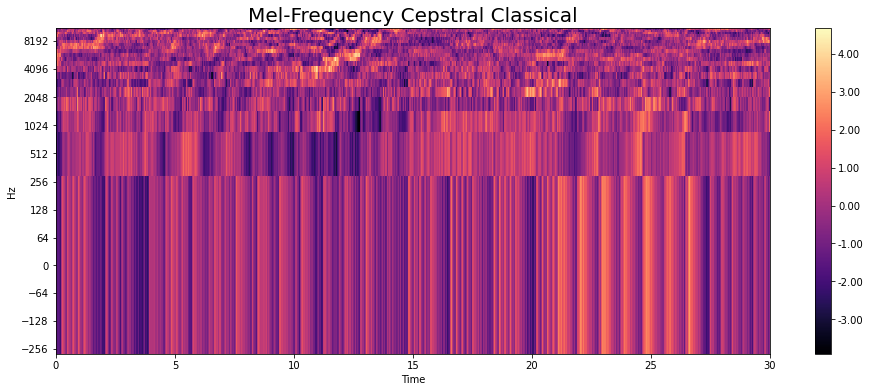

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/classical/classical.00025.wav')
audio_file, _ = librosa.effects.trim(y)
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

fig, ax = plt.subplots(figsize=(16,6))
img = librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='log', ax=ax, cmap='magma');
ax.set_title('Mel-Frequency Cepstral Classical', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

MFCC OF METAL

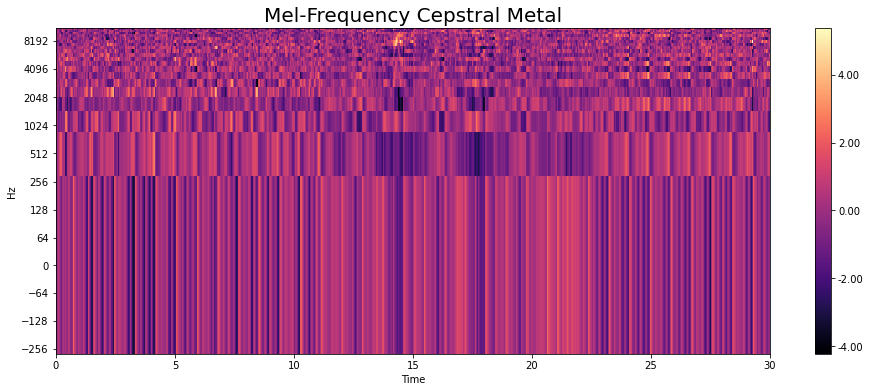

In [ ]:
y, sr = librosa.load(f'{general_path}/genres_original/metal/metal.00025.wav')
audio_file, _ = librosa.effects.trim(y)
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

fig, ax = plt.subplots(figsize=(16,6))
img = librosa.display.specshow(mfccs, sr=sr, x_axis='time', y_axis='log', ax=ax, cmap='magma');
ax.set_title('Mel-Frequency Cepstral Metal', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');

Delta

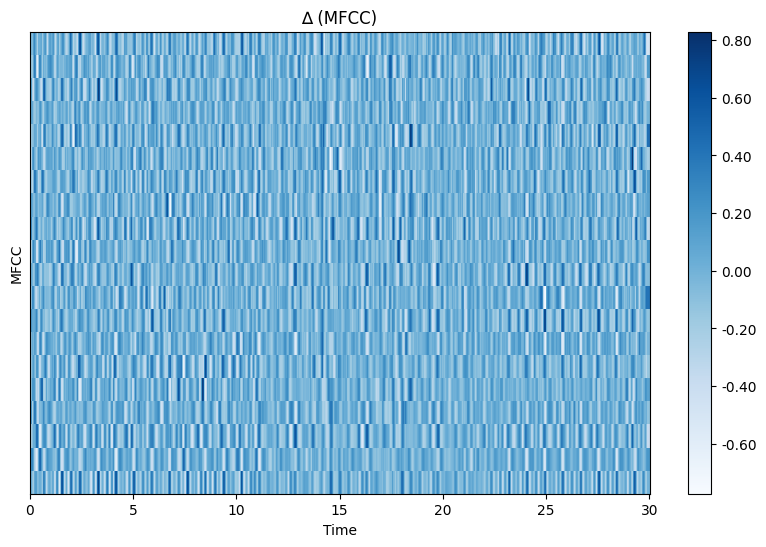

In [42]:
example_mfcc_delta = librosa.feature.delta(mfccs) 
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(example_mfcc_delta, ax=ax, x_axis='s', cmap = "Blues")
ax.set(title=f'∆ (MFCC)', xlabel='Time', ylabel='MFCC')
fig.colorbar(img, ax=ax, format=f'%0.2f');

delta delta

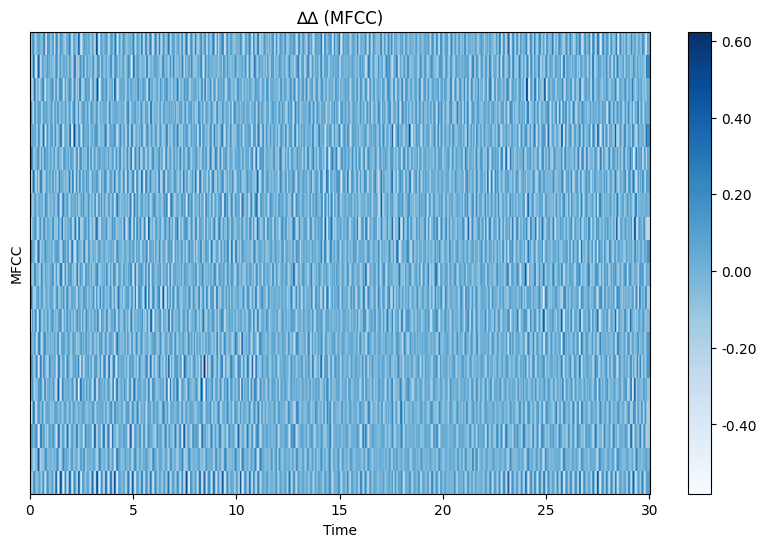

In [43]:
example_mfcc_delta_delta = librosa.feature.delta(mfccs, order=2)
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(example_mfcc_delta_delta, ax=ax, x_axis='s', cmap = "Blues")
ax.set(title=f'∆∆ (MFCC)', xlabel='Time', ylabel='MFCC')
fig.colorbar(img, ax=ax, format=f'%0.2f');